# Analiza Sentiment leksikona -BERTic




In [1]:

import pandas as pd

In [2]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [3]:
sent_an = pd.read_csv(RES_DIR + "srbsentiwordnet_a5.csv",  index_col=0)

In [4]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [5]:
sent_an

,POS,NEG,Lemme,Definicija,Vrsta,OBJ
ID,,,,,,
ENG30-03574555-n,0.001787,0.002019,ustanova,zgrada u kojoj se nalazi organizaciona jedinic...,n,0.996194
ENG30-07810907-n,0.004113,0.002229,začin,pripremljeni dodatak jelu za poboljšanje ukusa,n,0.993658
ENG30-00721431-n,0.051836,0.064365,mesto,"u nečijim prilikama, mogućnostima",n,0.883799
ENG30-00473799-v,0.009411,0.004478,"obnoviti,doterati,uglancati,uljuditi",Ostalo je još samo da se doteraju neke finese ...,v,0.986112
ENG30-00903385-v,0.019169,0.039390,oprostiti,Zapad mu je oprostio što se nekada računao u S...,v,0.941442
...,...,...,...,...,...,...
ENG30-15266265-n,0.003118,0.003071,mandat,mandat predsednika,n,0.993811
ENG30-15266685-n,0.001968,0.002122,sredina,vreme između početka i kraja vremenskog perioda,n,0.995910
ENG30-15266911-n,0.001867,0.002501,"gotovo,konac,kraj,prestanak,svršetak,završetak",tačka u vremenu kada se nešto završava,n,0.995632


In [6]:
pd.set_option('display.max_rows', None)

## Statistike

Raspored reči prema polaritetu 

In [7]:
# Define bin edges
bin_edges = [i/8 for i in range(9)]
bin_labels = [f"[{bin_edges[i]}, {bin_edges[i+1]})" for i in range(len(bin_edges)-1)]

# Function to bin data and get both count and percentage for each bin
def bin_data(column):
    binned_data = pd.cut(column, bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)
    counts = binned_data.value_counts().sort_index()
    percentages = (counts / counts.sum()) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Apply the function to each column and store results in a dictionary
results = {
    'OBJ': bin_data(sent_an['OBJ']),
    'POS': bin_data(sent_an['POS']),
    'NEG': bin_data(sent_an['NEG'])
}

results

{'OBJ':                Count  Percentage
 OBJ                             
 [0.0, 0.125)       0    0.000000
 [0.125, 0.25)     51    0.201422
 [0.25, 0.375)    521    2.057662
 [0.375, 0.5)     618    2.440758
 [0.5, 0.625)     453    1.789100
 [0.625, 0.75)    466    1.840442
 [0.75, 0.875)    871    3.439968
 [0.875, 1.0)   22340   88.230648,
 'POS':                Count  Percentage
 POS                             
 [0.0, 0.125)   24061   95.027646
 [0.125, 0.25)    470    1.856240
 [0.25, 0.375)    212    0.837283
 [0.375, 0.5)     202    0.797788
 [0.5, 0.625)     318    1.255924
 [0.625, 0.75)     57    0.225118
 [0.75, 0.875)      0    0.000000
 [0.875, 1.0)       0    0.000000,
 'NEG':                Count  Percentage
 NEG                             
 [0.0, 0.125)   23695   93.582148
 [0.125, 0.25)    402    1.587678
 [0.25, 0.375)    352    1.390205
 [0.375, 0.5)     249    0.983412
 [0.5, 0.625)     282    1.113744
 [0.625, 0.75)    307    1.212480
 [0.75, 0.875)     33    

In [8]:
 bin_data(sent_an['OBJ'])

,Count,Percentage
OBJ,,
"[0.0, 0.125)",0,0.000000
"[0.125, 0.25)",51,0.201422
"[0.25, 0.375)",521,2.057662
"[0.375, 0.5)",618,2.440758
"[0.5, 0.625)",453,1.789100
"[0.625, 0.75)",466,1.840442
"[0.75, 0.875)",871,3.439968
"[0.875, 1.0)",22340,88.230648


In [30]:
 bin_data(sent_an['POS'])

,Count,Percentage
POS,,
"[0.0, 0.125)",24061,95.027646
"[0.125, 0.25)",470,1.856240
"[0.25, 0.375)",212,0.837283
"[0.375, 0.5)",202,0.797788
"[0.5, 0.625)",318,1.255924
"[0.625, 0.75)",57,0.225118
"[0.75, 0.875)",0,0.000000
"[0.875, 1.0)",0,0.000000


In [31]:
 bin_data(sent_an['NEG'])

,Count,Percentage
NEG,,
"[0.0, 0.125)",23695,93.582148
"[0.125, 0.25)",402,1.587678
"[0.25, 0.375)",352,1.390205
"[0.375, 0.5)",249,0.983412
"[0.5, 0.625)",282,1.113744
"[0.625, 0.75)",307,1.212480
"[0.75, 0.875)",33,0.130332
"[0.875, 1.0)",0,0.000000


In [9]:
sent_an[sent_an["POS"]>.9][["Lemme", "POS"]]

,Lemme,POS
ID,,


In [10]:
(sent_an["POS"]>.9).sum()

0

Raspored reči prema negativnom polaritetu 

In [11]:
sent_an[sent_an["NEG"]>.9][["Lemme", "NEG"]]

,Lemme,NEG
ID,,


In [12]:
(sent_an["NEG"]>.9).sum()

0

In [13]:
(sent_an["OBJ"]<.1).sum()

0

In [14]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<Axes: title={'center': 'POS'}>, <Axes: title={'center': 'NEG'}>],
       [<Axes: title={'center': 'OBJ'}>, <Axes: >]], dtype=object)

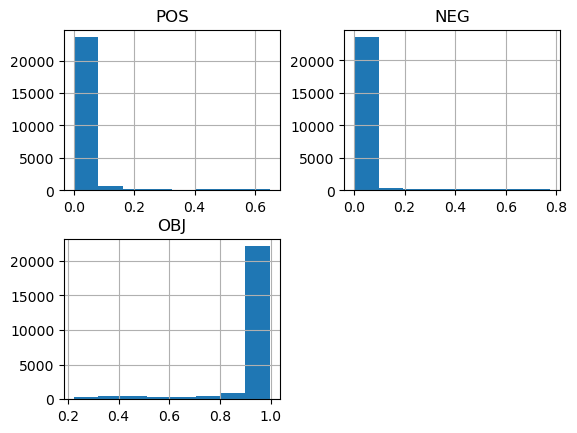

In [15]:
sent_an.hist(bins=8)

<Axes: >

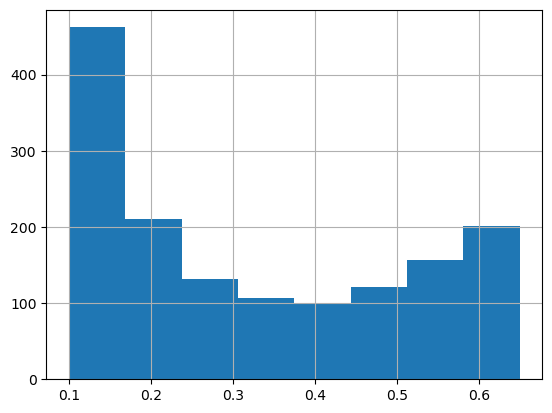

In [16]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<Axes: >

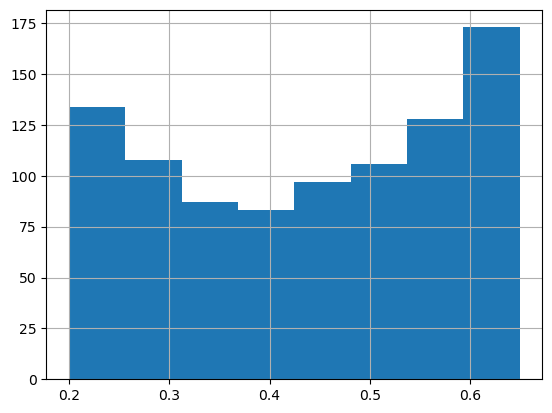

In [17]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<Axes: >

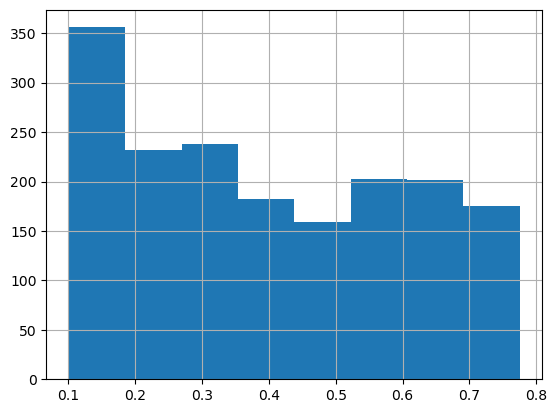

In [18]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<Axes: >

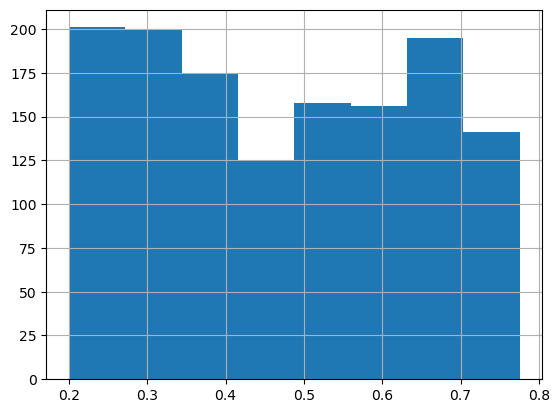

In [19]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [20]:
sent_an["Vrsta"].value_counts(sort=True)

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: ylabel='count'>

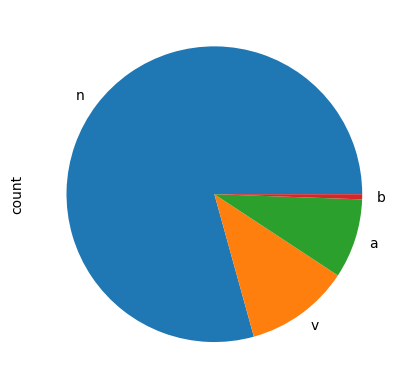

In [21]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

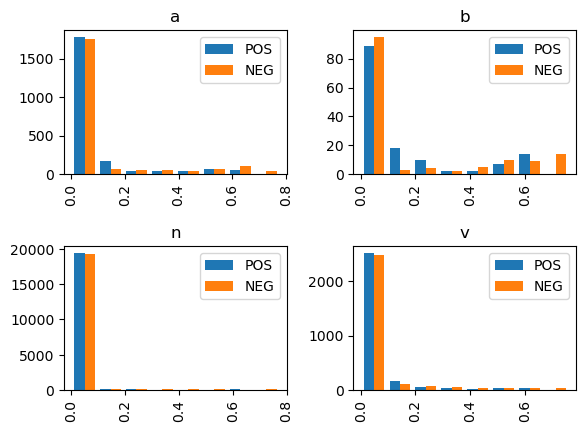

In [22]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

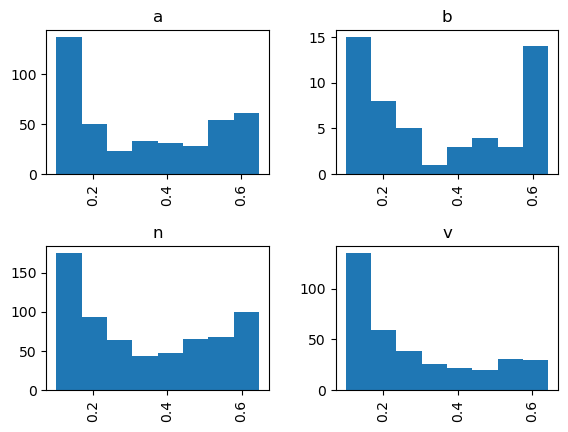

In [23]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

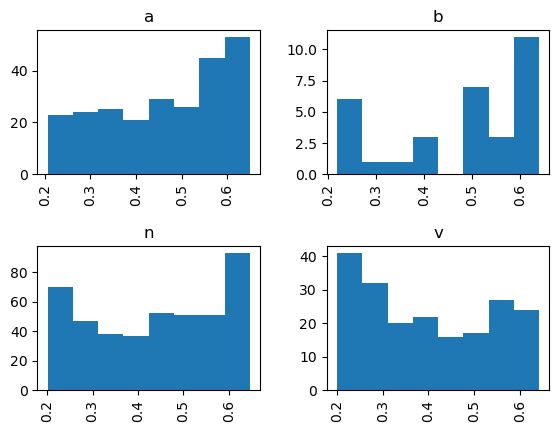

In [24]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

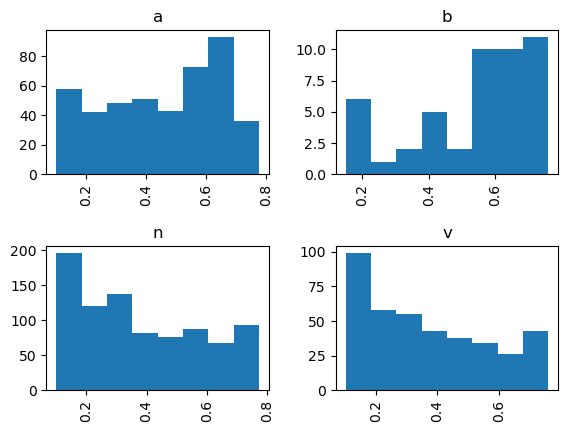

In [25]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

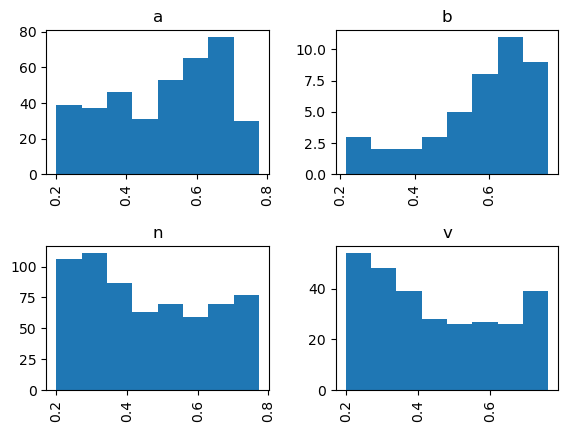

In [26]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

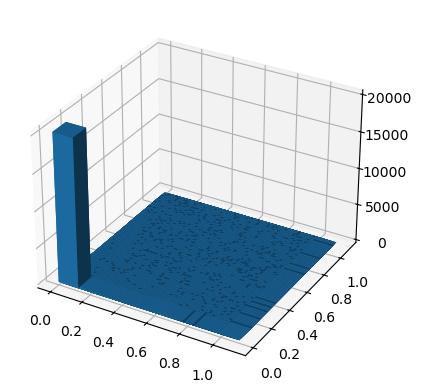

In [27]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<Axes: ylabel='count'>

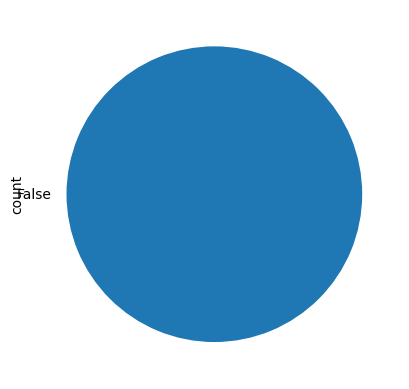

In [28]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

In [29]:
# srbsentiwordnet2.cvs
# srbsentiwordnet_a2.cvs